# Aula 1

É recomendado utilizar mais de um modelo de classificação em projetos de machine learning, para que sejam comparados os resultados e escolhido aquele modelo que tem um melhor desempenho, após todas as análises e aprimoramentos.

Utilizamos durante a aula o algoritmo de árvore de decisão, mas a biblioteca Scikit-Learn possui diversos outros métodos de classificação que podem ser utilizados no nosso projeto. Como desafio, utilize o algoritmo **Random Forest** para **criar um modelo** e **avaliar o desempenho com a acurácia e a matriz de confusão**, e **compare os resultados** com o resultado da árvore de decisão.

Como uma dica, vasculhe a [documentação do algoritmo RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Explore este material e perceba como importar a função. Durante esse processo, lembre-se de checar os parâmetros do método para evitar que o modelo se ajuste muito aos dados de treinamento.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
# importing data
data = pd.read_csv('./emp_automovel.csv')
data.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [23]:
# getting x and y
x = data.drop('inadimplente', axis=1)
y = data['inadimplente']

print(x.shape)
print(len(y))

(54025, 10)
54025


In [24]:
# splitting data for the model
x, x_test, y, y_test = train_test_split(x, y, test_size=.15, stratify=y, random_state=5)
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=5)

print(x_train.shape, x_val.shape, x_test.shape)
print(len(y_train), len(y_val), len(y_test))

(34440, 10) (11481, 10) (8104, 10)
34440 11481 8104


In [31]:
# preparing the Random Forest model (defaul parameters)
model = RandomForestClassifier(random_state=5)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=5)

Acurácia treino: 1.0
Acurácia validação: 0.9156867868652556


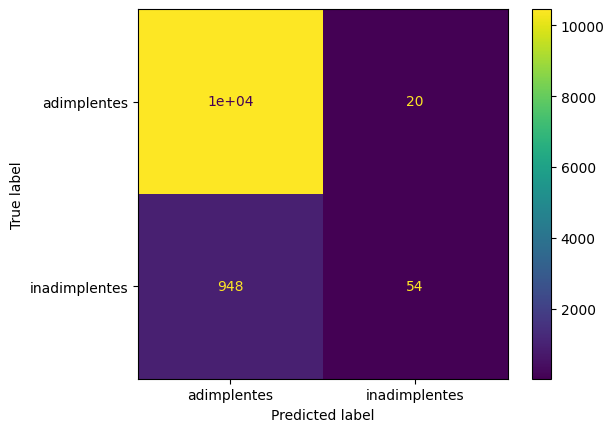

In [32]:
# evaluating the model

print(f'Acurácia treino: {model.score(x_train, y_train)}')
print(f'Acurácia validação: {model.score(x_val, y_val)}')

y_pred = model.predict(x_val)
conf_mat = confusion_matrix(y_val, y_pred)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['adimplentes', 'inadimplentes'])
display.plot();

Usando os parâmetros padrão da RandomForest, conseguimos um resultado ligeiramente maior de TP (embora ainda pequeno). O modelo também conseguiu melhorar mais ainda a classificação dos adimplentes, com um valor bem baixo de FP.

Também foi possível perceber que o treinamento foi ligeiramente demorado (cerca de 26s).

Alterando alguns hiperparâmetros do modelo e verificando como ele se comporta:

In [33]:
# max_samples is telling the model to draw 20% of x when creating each tree
model_2 = RandomForestClassifier(random_state=5, max_depth=10, max_samples=.2)
model_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_samples=0.2, random_state=5)

Acurácia treino: 0.9132113821138211
Acurácia validação: 0.9126382719275324


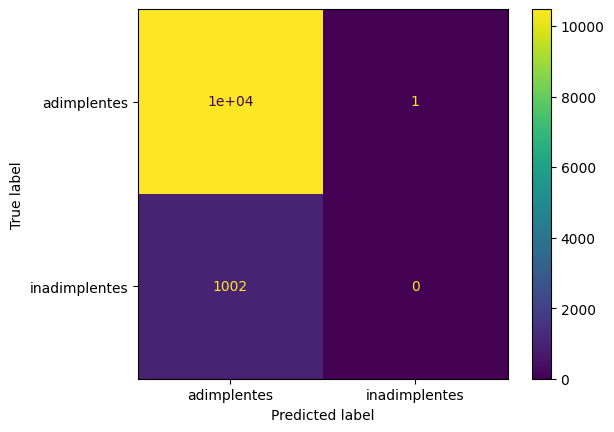

In [34]:
# evaluating the model

print(f'Acurácia treino: {model_2.score(x_train, y_train)}')
print(f'Acurácia validação: {model_2.score(x_val, y_val)}')

y_pred = model_2.predict(x_val)
conf_mat = confusion_matrix(y_val, y_pred)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['adimplentes', 'inadimplentes'])
display.plot();

O treinamento do novo modelo foi mais rápido. Ele, no entanto, foi ainda pior na classificação dos inadimplentes, não conseguindo acertar nenhuma vez nos testes. Tendo a acreditar que isso seja um problema de desbalanceamento dos dados, pois 90% da base é formada por pessoas adimplentes:

In [38]:
print(y.value_counts())
print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

0    41912
1     4009
Name: inadimplente, dtype: int64
0    31433
1     3007
Name: inadimplente, dtype: int64
0    10479
1     1002
Name: inadimplente, dtype: int64
0    7397
1     707
Name: inadimplente, dtype: int64


Fazendo um último teste, diminuindo a quantidade de árvores (o padrão é 100):

Acurácia treino: 0.99732868757259
Acurácia validação: 0.9165577911331766


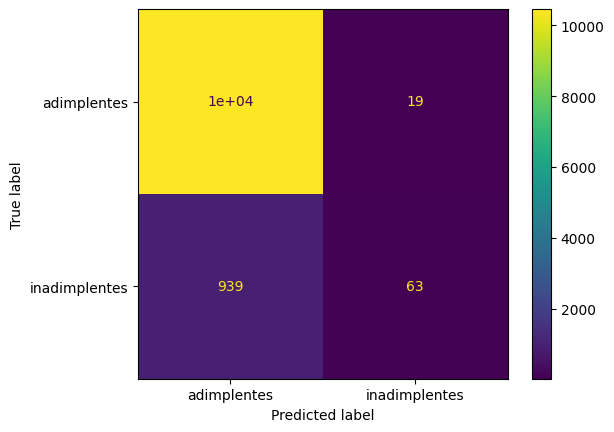

In [48]:
model_3 = RandomForestClassifier(random_state=5, n_estimators=30)
model_3.fit(x_train, y_train)
print(f'Acurácia treino: {model_3.score(x_train, y_train)}')
print(f'Acurácia validação: {model_3.score(x_val, y_val)}')

y_pred = model_3.predict(x_val)
conf_mat = confusion_matrix(y_val, y_pred)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['adimplentes', 'inadimplentes'])
display.plot();

Este último modelo ficou um pouco melhor do que o primeiro. Comparando ambos utilizando a base de testes:

In [49]:
print(f'Acurácia modelo 1: {model.score(x_test, y_test)}')
print(f'Acurácia modelo 3: {model_3.score(x_test, y_test)}')

Acurácia modelo 1: 0.9151036525172754
Acurácia modelo 3: 0.9147334649555775


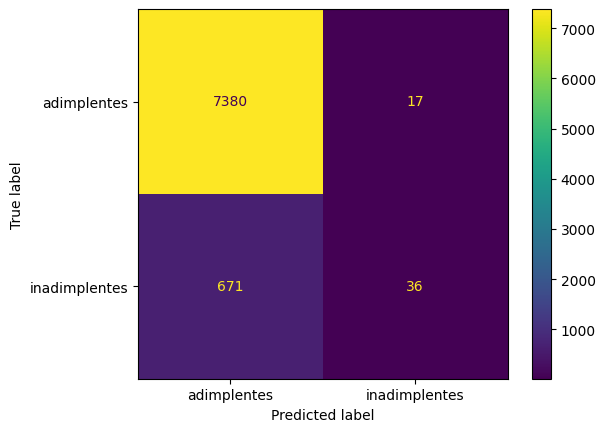

In [50]:
y_pred = model.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['adimplentes', 'inadimplentes'])
display.plot();

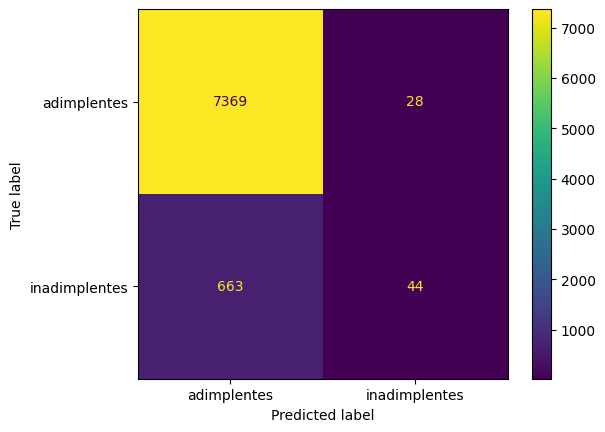

In [51]:
y_pred = model_3.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['adimplentes', 'inadimplentes'])
display.plot();

**Nenhum** dos modelos está se saindo bem em classificar corretamente os inadimplentes.